# Binary Classification Script
This python notebook takes seperate csv's for the data used to build the model and the data used for the scoring. This is how some of the problems are given in kaggle competition.

In [1]:
# standard binary classification modelling
# input file
import pandas as pd
import numpy as np

filename = '~/Documents/data/train.csv'
#df_input = pd.read_csv(filename, sep='\t', decimal=',', header=None)
df_input = pd.read_csv(filename, sep=',')

# get a view of the data
print(df_input.head(10))
#print(df_input.columns.values)
#print(len(df_input.columns.values))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

## Variable Definition
The cell below defines the variables in the dataset.

- identifier: this identifies the record, e.g. customer_id (currently functionality only allows one)
- target: this is the flag feature that you are predicting (currently functionality only allows one)
- exclude: these are features to exclude for the model
- categorical: these are categorical features that are set to flag variables by the model, this can be picked automatically if required

The remaining fields are assumed to be numeric and continuous. Note that python may struggle with memory if there are too many features. Especially if a lot of these fields are categorical because numerous flag fields are created.

The data is split into train and test by the fraction given in test_size (fraction of total data in test set)

In [2]:
# here we build the config of the file
from sklearn.cross_validation import train_test_split

allFields = list(df_input.columns.values)
identifier = ['PassengerId'] # identifier such as customer id
target = ['Survived'] # target field
exclude = ['Name', 'Ticket'] # fields to exclude
datetime = []

#categorical = ['field5', 'field9','field10','field14'] # these categorical fields get set to flag
categorical = [] # these categorical fields get set to flag
for i in range(0, len(allFields)):
    if df_input[allFields[i]].dtype == object and allFields[i] not in exclude+target+identifier+datetime:
        categorical.append(allFields[i])
print("Automatically Selected Categorical Features")
print(categorical)
numeric = list(filter(lambda c: c not in target + categorical + exclude + identifier + datetime, allFields))

#print(numeric)



Automatically Selected Categorical Features
['Sex', 'Cabin', 'Embarked']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Missing Values
This tile can be used to replace some missing values. 

Using the field definitions above numeric fields missing values are replaced by the mean and categorical vairables missing values are replace by the mode.

In [3]:
# This tile fills in missing values

for i in range(0, len(allFields)):
    if allFields[i] in numeric:
        #df_train.loc[:,allFields[i]].fillna(df_train[allFields[i]].mean(), inplace=True)
        #df_test.loc[:,allFields[i]].fillna(df_test[allFields[i]].mean(), inplace=True)
        df_input.loc[:,allFields[i]].fillna(df_input[allFields[i]].mean(), inplace=True)
    elif allFields[i] in categorical:
        #df_train.loc[:,allFields[i]].fillna(df_train[allFields[i]].mode().iloc[0], inplace=True)
        #df_test.loc[:,allFields[i]].fillna(df_test[allFields[i]].mode().iloc[0], inplace=True)
        df_input.loc[:,allFields[i]].fillna(df_input[allFields[i]].mode().iloc[0], inplace=True)
    elif allFields[i] in datetime:
        df_input[allFields[i]] = df_input[allFields[i]].replace({'1111-11-11': '1900-01-01'})
    #print(i, df_train[allFields[i]].isnull().sum())


## Datetime Features
Need to build something that deals with datetime fields. This tile is the placeholder for that.

In [4]:
import datetime as dt

for i in range(0, len(datetime)):
    columnName = str(datetime[i])+'_dt'
    daysToToday =  pd.to_datetime('today') - pd.to_datetime(df_input[datetime[i]])
    days = daysToToday.astype('timedelta64[D]')
    #days = days // np.timedelta64(1, 'D')
    df_input[columnName] = days
    #df_input[columnName] = pd.to_datetime('today') - pd.to_datetime(df_input[datetime[i]])
#df_input.head()

## Categorical Features
The loop below turns the categorical features into a series of flag variables.

For example a field, gender that contains 'M' or 'F' is turned into two flag fields gender_M and gender_F

In [5]:
# turns categorical variables into numerical (set to flag)
for i in range(0, len(categorical)):
    #dummy_cat_train = pd.get_dummies(df_train[categorical[i]], prefix=categorical[i])
    #dummy_cat_test = pd.get_dummies(df_test[categorical[i]], prefix=categorical[i])
    dummy_cat_input = pd.get_dummies(df_input[categorical[i]], prefix=categorical[i])
    #df_train = df_train.join(dummy_cat_train)
    #df_test= df_test.join(dummy_cat_test)
    df_input= df_input.join(dummy_cat_input)

#df_train.head(5)

## Arrayify data
Function from another script that turns a dataframe into numpy arrays of the target variable and the independent features. In addition a list of the features is given.

In [6]:
def arrayify_data_and_target(data, label, exclude):
    """
    :param data: pandas DataFrame to split in to data and target
    :param label: name of the column to be used as target variable
    :param exclude: list of columns to exclude
    :return: (data, target, features)
    """
    target = data[label]
    independent = data.drop(exclude, axis=1)
    return np.array(independent), np.array(target), independent.columns.values

## Drop Fields

In [7]:
# remove all the fields not required
df_train, df_test = train_test_split(df_input, test_size = 0.1)
to_drop = exclude + target + categorical + identifier+ datetime
X_train, Y_train, features_train = arrayify_data_and_target(df_train, target, to_drop)
X_test, Y_test, features_test = arrayify_data_and_target(df_test, target, to_drop)

## Define Classifiers
Define the classifiers for the fit. All from sklearn. Turn off verbose to reduce output.

In [8]:
# build the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#clf = LogisticRegression(C=1, verbose=5, max_iter=300)
#LR_balanced = LogisticRegression(C=1, class_weight='balanced', max_iter=300, verbose=0)
#ada = AdaBoostClassifier(n_estimators=200)
RF = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_leaf_nodes=300, max_features='auto', verbose=5)
#RF_noBS = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_leaf_nodes=300, max_features='auto', verbose=5, bootstrap=False)
gradBoost = GradientBoostingClassifier(n_estimators=200, loss='exponential', max_leaf_nodes=300, verbose=5)

#clf = SVC(probability=True, verbose=5, class_weight='balanced')

## Fit Models

In [9]:
# fit the model(s) then score the test set
#LR_balanced_model = LR_balanced.fit(X_train, Y_train.ravel())
#ada_model = ada.fit(X_train, Y_train.ravel())
RF_model = RF.fit(X_train, Y_train.ravel())
#RF_model_noBS = RF_noBS.fit(X_train, Y_train.ravel())
gradBoost_model = gradBoost.fit(X_train, Y_train.ravel())

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


         7           0.7414            0.98s
         8           0.7221            0.97s
         9           0.7050            0.95s
        10           0.6892            0.96s
        11           0.6755            0.99s
        12           0.6621            0.99s
        13           0.6511            1.00s
        14           0.6416            0.98s
        15           0.6309            0.96s
        16           0.6236            0.95s
        17           0.6171            0.93s
        18           0.6099            0.92s
        19           0.6069            0.89s
        20           0.6000            0.88s
        21           0.5943            0.87s
        22           0.5919            0.85s
        23           0.5857            0.84s
        24           0.5804            0.83s
        25           0.5757            0.81s
        26           0.5730            0.80s
        27           0.5690            0.79s
        28           0.5670            0.78s
        29

## Score Test Sets

In [10]:
#Y_scores_LRb = LR_balanced_model.predict_proba(X_test)[:, 1]
#Y_scores_ada = ada_model.predict_proba(X_test)[:, 1]
Y_scores_RF = RF_model.predict_proba(X_test)[:, 1]
#Y_scores_RF_noBS = RF_model_noBS.predict_proba(X_test)[:, 1]
Y_scores_gradBoost = gradBoost_model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


## Build ROC Curve Data

In [11]:
# create fpr and tpr for the model outputs
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

#fpr_lrb, tpr_lrb, thresholds_lrb = roc_curve(Y_test, Y_scores_LRb)
#fpr_ada, tpr_ada, thresholds_ada = roc_curve(Y_test, Y_scores_ada)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(Y_test, Y_scores_RF)
#fpr_RF_noBS, tpr_RF_noBS, thresholds_RF_noBS = roc_curve(Y_test, Y_scores_RF_noBS)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, Y_scores_gradBoost)

## Draw the ROC Curve
This is drawn here to compare the classifiers. Further plots and details on single classifier can be created using the lift report function below.

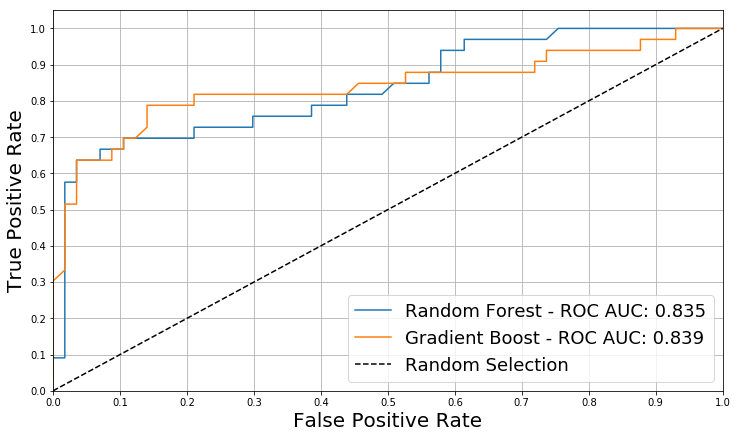

In [12]:
# Standard sklearn ROC curve
#roc_auc=round(scores['AUC score'],3)
%matplotlib inline
import matplotlib.pyplot as plt
#roc_auc_lrb = auc(fpr_lrb, tpr_lrb)
#roc_auc_ada = auc(fpr_ada, tpr_ada)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#roc_auc_RF_noBS = auc(fpr_RF_noBS, tpr_RF_noBS)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(12,7))
#plt.plot(fpr_lrb, tpr_lrb, label='Logistic Regression - ROC AUC: '+str(round(roc_auc_lrb,3)))
#plt.plot(fpr_ada, tpr_ada, label='Ada Boost - ROC AUC: '+str(round(roc_auc_ada,3)))
plt.plot(fpr_RF, tpr_RF, label='Random Forest - ROC AUC: '+str(round(roc_auc_RF,3)))
#plt.plot(fpr_RF_noBS, tpr_RF_noBS, label='Random Forest no BS - ROC AUC: '+str(round(roc_auc_RF,3)))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boost - ROC AUC: '+str(round(roc_auc_gb,3)))

plt.plot([0, 1], [0, 1], 'k--', label='Random Selection')
plt.grid()
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend(loc="lower right", fontsize=18)
#plt.savefig("ROC_Curve_NLB_RF_GB_t1t2_fullwhack.pdf")
plt.show()
plt.close()

## Predictor Importances
Below is an example of how to output predictor importances. Note that some classifiers obviously dont have importances such as logistic regression (feature\_coefficients\_ can be used instead).

In [13]:
# list the importances of a model, here ive used the random forest model
importances = RF_model.feature_importances_
#importances = gradBoost_model.feature_importances_
idxs = np.argsort(importances)[::-1]
for i in range(len(idxs)):
    #if i<10:
    print('Feature: '+str(features_train[idxs[i]]), 'Importance: '+str(importances[idxs[i]]))

Feature: Fare Importance: 0.217153788619
Feature: Age Importance: 0.209671259793
Feature: Sex_male Importance: 0.127841650384
Feature: Sex_female Importance: 0.125396588173
Feature: Pclass Importance: 0.0669462555531
Feature: SibSp Importance: 0.0475594129219
Feature: Parch Importance: 0.0412519055883
Feature: Cabin_B96 B98 Importance: 0.0340123457129
Feature: Embarked_S Importance: 0.0127113569434
Feature: Embarked_C Importance: 0.0113499760548
Feature: Embarked_Q Importance: 0.00691819133244
Feature: Cabin_C52 Importance: 0.00323737051534
Feature: Cabin_E24 Importance: 0.00323635289738
Feature: Cabin_C22 C26 Importance: 0.00311404719429
Feature: Cabin_E25 Importance: 0.00290665048088
Feature: Cabin_E10 Importance: 0.00223898286665
Feature: Cabin_C126 Importance: 0.00211454606012
Feature: Cabin_D56 Importance: 0.00203899949121
Feature: Cabin_E77 Importance: 0.0019431281303
Feature: Cabin_C49 Importance: 0.00191210062744
Feature: Cabin_E17 Importance: 0.00188125483396
Feature: Cabin_C1

## Build Lift Report
Use Alex's function to create a table with all the important metrics used for judging a model.

In [14]:
# alex lift report function

def lift_report(df, septr='|', jitter_on=False, nBins=10):

    '''
    Function produces a lift report from a scores and target dataframe
    Arguments
        df    - this is a dataframe with two columns, 'actual' which gives the actual class (1 or 0)
                and 'scores' which gives the model scores for each record
        septr - separator of input ?
        jitter_on - this function settle ties in the ranking using a random perturbation
        nBins - binning for table, e.g nBins=10 is deciles and nBins=100 is percentiles
        
    Output fields
        Decile Min   - For each bin the minimum model score
        Decile Max   - For each bin the maximum model score
        Trues        - If all the candidates in the bin were assigned to positive class (target=1), 
                       this many true values within this bin
        Falses       - Same as above but for false
        Total        - Total candidates in the bin
        Odds         -
        Trues Proportion - 
        Cumulative Trues Proportion - 
        Gain         - The percentage of total positive class contained within this bin
        Cumulative Gains - The percetnatge of total positive class contained within this and the previous bins
        Lift         - Lift of the previous bins inclusive of this bin (this is really cumulative lift)
        FPR          - The percentage of total negative class contained within this and the previous bins
        K-S          - K-S statistic
    '''
    
    ## Import necessary packages
    import sys
    import pandas as pd
    import numpy as np
    import pandas.core.algorithms as algos
    from pandas import Series
    from sklearn.metrics import roc_auc_score


    ## Import data
    #df = pd.read_csv(filename, sep=septr)
    
    ## Checking requirements
    if ('actual' not in df.columns) & ('score' not in df.columns):
        msg = 'Input file should contain two columns named as "actual" and \
        "score"; instead got {}'.format(str(df.columns))
        sys.exit(msg)
    else:
        pass

    if (len(df.actual.unique())!=2)|((df.actual.min()!=0)&(df.actual.max()!=1)):
        msg = 'This function is only used for binary classifiers with 0/1 \
        values; instead got {}'.format(sorted(df.actual.unique()))
        sys.exit(msg)
    else:
        pass


    if (df.score.min() < 0) | (df.score.max() >1):
        msg = 'Scores should only have values [0,1]; '
        'instead we have [{},{}]'.format(df.score.min(), df.score.max())
        sys.exit(msg)
    else:
        pass
    
    ## Obtain deciles of scores.
    # Sometimes binning will cause errors;
    # hence we can add small perturbation to scores

    # Relevant function
    def jitter(a_series, noise_reduction=1000000):
            return (np.random.random(len(a_series))*a_series.std()/
                    noise_reduction)-(a_series.std()/(2*noise_reduction))

    if jitter_on == True:
        df['decile'] = pd.qcut(df.score + jitter(df.score), nBins)
    else:
        df['decile'] = pd.qcut(df.score, nBins)

    # Create groupby df object for further processing
    group_temp = df.groupby('decile', as_index = False)

    # Shape output df frame
    df_grp = pd.DataFrame(group_temp.min().score)
    df_grp['Decile Max'] = group_temp.max().score
    df_grp.columns=['Decile Min', 'Decile Max']

    # Within propensity deciles collect
    # counts of Trues, Falses and totals
    df_grp['Trues'] =group_temp.agg({'actual': lambda x: sum(abs(x))}).actual
    df_grp['Falses'] = group_temp.agg({'actual':
        lambda x: sum(abs(1-x))}).actual
    df_grp['Total'] = group_temp.agg({'actual': lambda x: len(x)}).actual

    del group_temp
    
    # Sort ahead of cumulative operations
    df_grp = (df_grp.sort_index(level = ['Decile Min', 'Decile Max'],
        ascending=False)).reset_index(drop = True)

    # Calculate Odds (#non-Trues/#Trues)
    df_grp['Odds'] = (df_grp.Falses / df_grp.Trues)

    # Calculate proportion of Trues within each decile
    df_grp['Trues Proportion'] = (df_grp.Trues/df_grp.Total)

    # Calculate running average of above proportion
    df_grp['Cumulative Trues Proportion'] = ((df_grp.Trues.cumsum() /
        df_grp.Total.cumsum()))

    # Calculate proportion of within-decile Trues to all Trues for each decile
    df_grp['Gain'] = (df_grp.Trues/df_grp.Trues.sum())
    # Calculate gains as cumulative sum of above variable
    df_grp['Cumulative Gains']=(df_grp['Gain'].cumsum())
    # Calculate Lift
    df_grp['Lift']=df_grp['Cumulative Gains']/((df_grp.index.astype(float)+1)/nBins)
    # Required for calculating K-S score
    df_grp['FPR']=((df_grp.Falses/
        df_grp.Falses.sum()).cumsum())

    
    # Calculate K-S score as difference between cumulative Trues vs
    # cumulative Falses percent
    df_grp['K-S'] = abs(df_grp['Cumulative Gains'] - df_grp['FPR'])


    # Format results nicely
    df_grp['Decile Min'] = df_grp['Decile Min'].apply(lambda x: round(x,8))
    df_grp['Decile Max'] = df_grp['Decile Max'].apply(lambda x: round(x,8))
    df_grp['Odds'] = df_grp['Odds'].apply(lambda x: round(x,2))
    df_grp['Trues Proportion'] = df_grp['Trues Proportion'].apply(lambda x: round(x,2))
    df_grp['Cumulative Trues Proportion'] = \
        df_grp['Cumulative Trues Proportion'].apply(lambda x: round(x,2))
    df_grp['Lift'] = df_grp['Lift'].apply(lambda x: round(x,8))
    df_grp['Cumulative Gains'] = df_grp['Cumulative Gains'].apply(lambda x: round(x,8))
    df_grp['FPR'] = df_grp['FPR'].apply(lambda x:
        round(x,8))
    df_grp['K-S'] = df_grp['K-S'].apply(lambda x: round(x,8))
    df_grp_basic = df_grp[['Decile Min', 'Decile Max', 'Lift', 'Cumulative Gains']]

    
    ## Calculate performance statistics
    # Get AUC score from sklearn
    auc_score = roc_auc_score(df.actual, df.score)
    # Calculate Gini score as 2*AUC-1
    gini_score = 2*auc_score - 1
    # Get maximum K-S separation
    ks_score = df_grp['K-S'].max()
    # Combine
    scores = {'AUC score': auc_score, 'Gini score': gini_score,
        'K-S Score' : ks_score}

    return df, df_grp, df_grp_basic, scores


## Lift Report Data Adjustment
This cell just selects the actual records class and the score produced by the model. This is the output required by alex's function.

In [15]:
df_test['score'] = Y_scores_RF.tolist()
df_liftReport = df_test.loc[:,('Survived', 'score')]
df_liftReport.rename(columns={'Survived':'actual'}, inplace=True)
df_liftReport.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,actual,score
15,1,0.920000
194,1,0.755000
529,0,0.213071
214,0,0.153765
837,0,0.000000


## Produce Report
Produce the lift report in table form. numb_bins is the number of bins you want to aggregate the scores into. For example 10 bins in deciles.

In [16]:
numb_bins = 100
df_full, df_binned, df_binned_basic, scores = lift_report(df_liftReport, septr=',', jitter_on=True, nBins=numb_bins)
df_binned.head(10)

outside
1
2
3
4
5
6


,Decile Min,Decile Max,Trues,Falses,Total,Odds,Trues Proportion,Cumulative Trues Proportion,Gain,Cumulative Gains,Lift,FPR,K-S
0,0.995,0.995,1,0,1,0.000000,1.0,1.00,0.030303,0.030303,3.030303,0.000000,0.030303
1,0.995,0.995,1,0,1,0.000000,1.0,1.00,0.030303,0.060606,3.030303,0.000000,0.060606
2,0.985,0.985,1,0,1,0.000000,1.0,1.00,0.030303,0.090909,3.030303,0.000000,0.090909
3,0.975,0.975,0,1,1,inf,0.0,0.75,0.000000,0.090909,2.272727,0.017544,0.073365
4,0.965,0.965,1,0,1,0.000000,1.0,0.80,0.030303,0.121212,2.424242,0.017544,0.103668
5,0.955,0.955,1,0,1,0.000000,1.0,0.83,0.030303,0.151515,2.525253,0.017544,0.133971
6,0.950,0.950,1,0,1,0.000000,1.0,0.86,0.030303,0.181818,2.597403,0.017544,0.164274
7,0.940,0.940,1,0,1,0.000000,1.0,0.88,0.030303,0.212121,2.651515,0.017544,0.194577
8,0.925,0.925,1,0,1,0.000000,1.0,0.89,0.030303,0.242424,2.693603,0.017544,0.224880
9,NaN,NaN,0,0,0,NaN,NaN,0.89,0.000000,0.242424,2.424242,0.017544,0.224880


## Gains Chart
Note: The more bins that are used in the lift_report function the better the resolution of the plots.

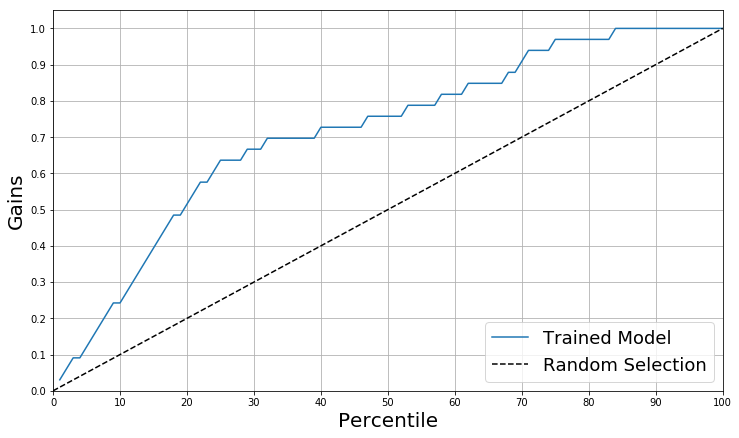

In [17]:
# Standard sklearn Gains chart
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(12,7))
plt.plot(df_binned.index+1, df_binned['Cumulative Gains'], label='Trained Model')
plt.plot([0, numb_bins], [0, 1], 'k--', label='Random Selection')
plt.grid()
plt.xticks(np.arange(0, numb_bins*1.1, numb_bins/10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim([0.0, numb_bins])
plt.ylim([0.0, 1.05])
plt.xlabel('Percentile', fontsize=20)
plt.ylabel('Gains', fontsize=20)
plt.legend(loc="lower right", fontsize=18)
# if you want to print out to file below
#plt.savefig("GainsChart_latency3_devsample.pdf")
plt.show()
plt.close()

## Lift Chart
Note: The more bins that are used in the lift_report function the better the resolution of the plots.

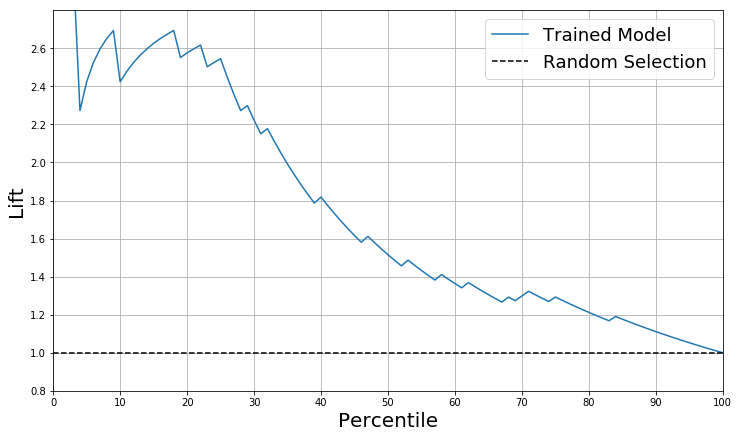

In [18]:
# Standard Lift Chart
plt.figure(figsize=(12,7))
plt.plot(df_binned.index+1, df_binned['Lift'], label='Trained Model')
plt.xticks(np.arange(0, numb_bins*1.1, numb_bins/10))
plt.yticks(np.arange(0.8, 2.8, 0.2))
plt.xlim([0.0, numb_bins])
plt.ylim([0.8, 2.8])
plt.plot([0, numb_bins], [1,1], 'k--', label='Random Selection')
plt.grid()
plt.xlabel('Percentile', fontsize=20)
plt.ylabel('Lift', fontsize=20)
plt.legend(loc="upper right", fontsize=18)
#plt.savefig("LiftChart_latency3_devsample.pdf")
plt.show()
plt.close()

## ROC Curve
Note: The more bins that are used in the lift_report function the better the resolution of the plots.

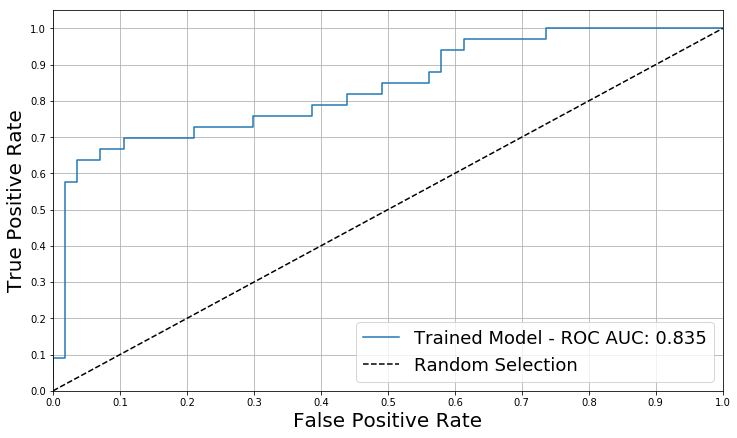

In [19]:
# Standard sklearn ROC curve
roc_auc=round(scores['AUC score'],3)
plt.figure(figsize=(12,7))
plt.plot(df_binned['FPR'], df_binned['Cumulative Gains'], label='Trained Model - ROC AUC: '+str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Selection')
plt.grid()
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend(loc="lower right", fontsize=18)
#plt.savefig("ROC_Curve_latency3_devsample.pdf")
plt.show()
plt.close()

## K-S Chart
Not used this plot much yet but some people may find its useful
Note: The more bins that are used in the lift_report function the better the resolution of the plots.

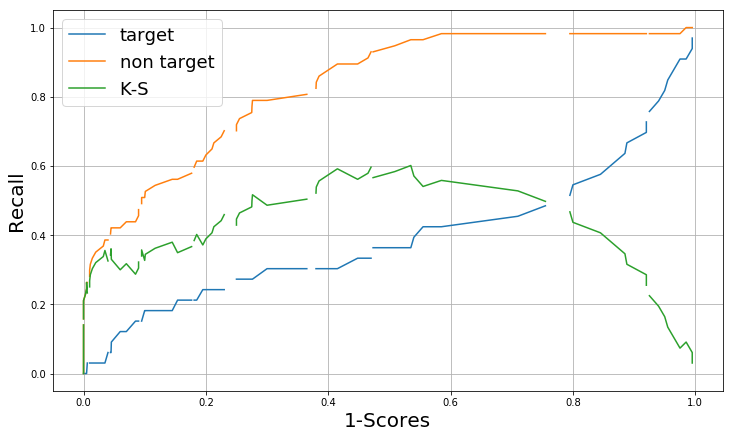

In [20]:
# K-S Chart
# not ever used this but it may be required
plt.figure(figsize=(12,7))
plt.plot(df_binned['Decile Min'], 1-df_binned['Cumulative Gains'], label='target')
plt.plot(df_binned['Decile Min'], 1-df_binned['FPR'], label='non target')
plt.plot(df_binned['Decile Min'], df_binned['K-S'], label='K-S')
plt.grid()
#plt.xlim([0.0, 1])
#plt.ylim([0.0, 1.05])
#plt.xticks(np.arange(0, 1.1, 0.1))
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('1-Scores', fontsize=20)
plt.ylabel('Recall', fontsize=20)
plt.legend(loc="upper left", fontsize=18)
#plt.savefig("KS_Curve_latency3_devsample.pdf")
plt.show()
plt.close()
#df_binned.head(10)

## Input Scoring Set
Often you are given a seperate dataset that you need to score. This second part ingests and then scores

In [21]:
filename2 = '~/Documents/data/train.csv'
df_score = pd.read_csv(filename2, sep=',')

#print(df_score.head())

## Variable Definition (Scoring)

In [16]:
# here we build the config of the file

#identifier2 = ['field1'] # identifier such as customer id
#target2 = ['field2'] # target field
#exclude2 = [] # fields to exclude 
#categorical2 = ['field5', 'field9','field10','field14'] # these categorical fields get set to flag

## Missing Values (Scoring)

In [22]:
# This tile fills in missing values

for i in range(0, len(allFields)):
    if allFields[i] in numeric:
        df_score.loc[:,allFields[i]].fillna(df_score[allFields[i]].mean(), inplace=True)
    elif allFields[i] in categorical:
        df_score.loc[:,allFields[i]].fillna(df_input[allFields[i]].mode().iloc[0], inplace=True)
    elif allFields[i] in datetime:
        df_score[allFields[i]] = df_score[allFields[i]].replace({'1111-11-11': '1900-01-01'})
    #print(i, df_train[allFields[i]].isnull().sum())


## Categorical Features (Scoring)

In [23]:
# turns categorical variables into numerical (set to flag)
for i in range(0, len(categorical)):
    dummy_cat = pd.get_dummies(df_score[categorical[i]], prefix=categorical[i])
    df_score = df_score.join(dummy_cat)

#df_score.head(5)

## Different Features
Ive found sometimes preprocessing means that there is a different set of features in the two data samples. Here I can find features that are in the scoring sample and not the model building sample and remove them.

In [24]:
trainList = list(df_train.columns.values)
scoreList = list(df_score.columns.values)
removeFeatures = [a for a in trainList+scoreList if (a not in trainList) or (a not in scoreList)]

## Drop Fields (Scoring)

In [25]:
# remove all the fields not required
to_drop2 = exclude + categorical + identifier+target+removeFeatures
independent_scoring = df_score.drop(to_drop2, axis=1)
X_score = np.array(independent_scoring)
X_features = independent_scoring.columns.values

## Score Scoring Data

In [26]:
Y_scores_gradBoost = gradBoost_model.predict_proba(X_score)[:, 1]

## Append to Scoring Dataset

In [28]:
df_score['scores'] = Y_scores_gradBoost.tolist()
df_score.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,scores
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0.059097
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0.995172
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,0.521860
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,0.950223
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,0.104742


In [79]:
# Output to csv
#np.savetxt("/Users/roberthickling/Documents/Projects/16_08_11_NLB/NLB_testScores_orderID2.csv", Y_scores_RF_scoringDataset, delimiter=",")